In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Quadratic Loss function


In [ ]:
def Quadratic_loss(x,y):
  return x**2 + 10*y**2

Gradient for Quadratic loss func

In [ ]:
def Quadratic_grad(x,y):
  dx = 2*x
  dy = 20*y
  return np.array([dx,dy])

Vanilla/Batch Gd

In [ ]:
def vanilla(grad_func,eta,epoches,start_point):
  x,y = start_point
  path = [(x,y)]
  losses = [Quadratic_loss(x,y)]

  for _ in range(epoches):
    dx,dy = grad_func(x,y)
    x = x - eta*dx
    y = y - eta*dy
    path.append((x,y))
    losses.append(Quadratic_loss(x,y))
  return path,losses # may be wrong


M0mentum_GD

In [ ]:
def momentum_Gd(grad_func,eta,beta,epoches,start_point):
  x,y = start_point
  v = np.array([0,0])
  path = [(x,y)]
  losses = [Quadratic_loss(x,y)]

  for _ in range(epoches):
    dx,dy = grad_func(x,y)
    v = beta*v + (1-beta)*np.array([dx,dy])
    x = x - eta*v[0]
    y = y - eta*v[1]

    path.append((x,y))
    losses.append(Quadratic_loss(x,y))
  return path,losses

visualization func plots path

In [ ]:
def plot_paths(functions, path, labels, title):
  X,Y = np.meshgrid(np.linspace(-2,2,400),np.linspace(-2,2,400))
  # Changed 'function' to 'functions' to use the passed function for calculation.
  Z = functions(X,Y)

  plt.figure(figsize=(8,6))
  plt.contour(X,Y,Z,levels=50,cmap = 'jet')

  for path,label in zip(path,labels):
    # Convert the path to a NumPy array before slicing
    path_array = np.array(path)
    plt.plot(path_array[:,0],path_array[:,1],label = label)
    plt.scatter(path_array[0,0],path_array[0,1],color='green',label = 'start')
    plt.scatter(path_array[-1,0],path_array[-1,1],color='red',label = 'end')

  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  plt.show()

visualization for losses

In [ ]:
def plot_losses(losses, labels, title):
  plt.figure(figsize=(8,6))

  for loss, label in zip(losses, labels):
    plt.plot(loss, label=label)

  plt.title(title)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

Parameters

In [ ]:
eta_bgd = 0.1
eta_momentum = 0.1
beta = 0.9
epoches = 50
start_point = (1.5,1.5)

run optimizations

In [ ]:
path_vanilla,losses_vanilla = vanilla(Quadratic_grad,eta_bgd,epoches,start_point)
path_momentum,losses_momentum = momentum_Gd(Quadratic_grad,eta_momentum,beta,epoches,start_point)

plot results

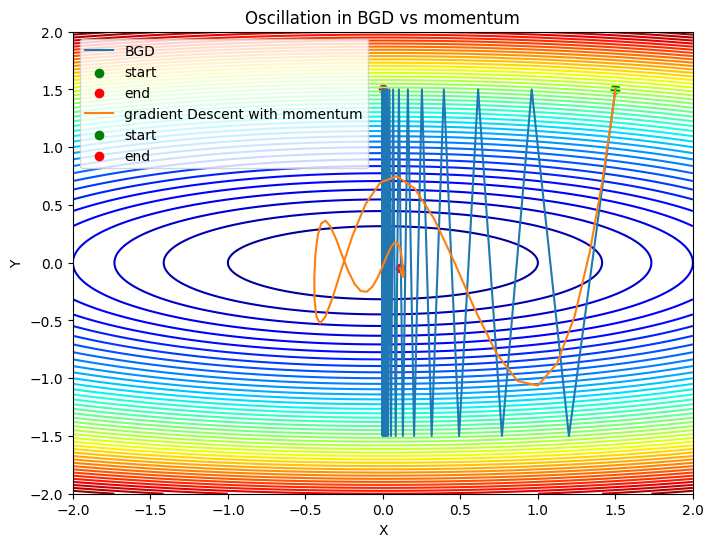

In [ ]:
plot_paths(Quadratic_loss,[path_vanilla,path_momentum],["BGD","gradient Descent with momentum"],"Oscillation in BGD vs momentum")


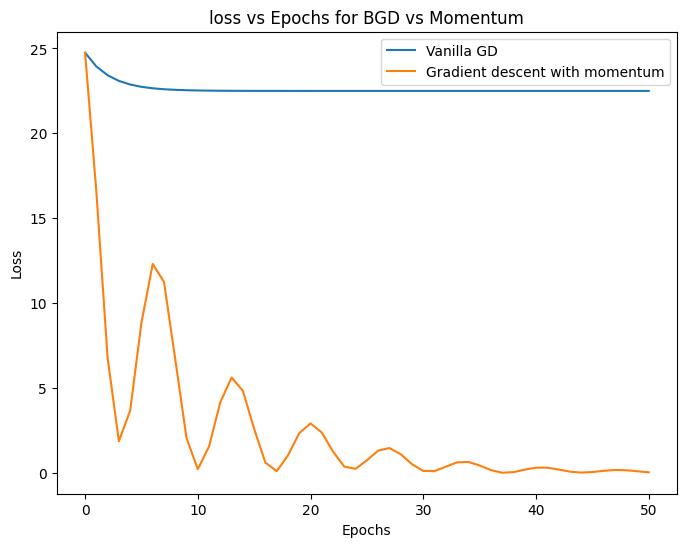

In [ ]:
plot_losses([losses_vanilla,losses_momentum],["Vanilla GD","Gradient descent with momentum"],"loss vs Epochs for BGD vs Momentum")